In [1]:
# Library imports
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

import tools
from train import generate_graph, train

# Reproducibility

The results of this notebook are not deterministic. Therefore, the results from a previous run are loaded here. Run this cell instead of the cells in the following section ('Experiment Code') in order to generate an identical plot to the accompanying paper in the 'Plot' section at the end of the notebook.

In [2]:
# Load the previous results
with open('saved_results//hyperparameters_nodes_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Experiment Code

In [3]:
# Fix random seed for reproducibility
np.random.seed(628496)

# Stop on errors
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
results = {}

debtor_days_by_acc = ()
average_rates_by_acc = ()

for count_sales_nodes in tqdm(range(1, 18)):
    # Pick a new average rate of the sales occurring, and a number
    # of days between these new sales and the debtors settling
    debtor_days_by_acc = tuple(list(debtor_days_by_acc) + [np.random.randint(1, 30)])
    average_rates_by_acc = tuple(list(average_rates_by_acc) + [0.15 + np.random.random() / 20])

    # Generate the synthetic data with this additional sales node
    edges_by_day, last_day, raw_accounts = \
        tools.simulate_many_nodes(
            count_sales_nodes=count_sales_nodes,
            debtor_days_by_acc=debtor_days_by_acc,
            average_rates_by_acc=average_rates_by_acc,
            total_days=30
        )

    # Count the number of generated edges
    count_edges = sum(len(day) for day in edges_by_day.values())

    # Start recording the time
    start_time = time.time()

    # Create a graph object
    graph = generate_graph(
        raw_accounts=raw_accounts,
        edges_by_day=edges_by_day,
        last_day=last_day,
        node_dimension=32,
        graph_kwords={
            'causal_learning_rate': 0.01,
            'weight_regularisation_rate': 10**(-5),
            'spontaneous_regularisation_rate': 10**(-7)
        }
    )

    # Train
    probabilities = train(
        graph, edges_by_day, last_day, iterations=50,
        plot_log_likelihood=False, use_tqdm=False,
        spontaneous_learning_startpoint=25
        )

    # Stop the timer
    end_time = time.time()

    # Print and record the results
    print(f'{count_sales_nodes} sales nodes, '
          f'{count_edges} edges, '
          f'time taken: {(end_time-start_time)/60:,.4f} minutes, '
          f'final log-likelihood: {probabilities[-1]:,.2f}')
    results[count_sales_nodes+2] = {
        'count_edges': count_edges,
        'time_taken': (end_time-start_time)/60,
        'log_likelihood': probabilities[-1]
    }

100%|██████████| 50/50 [00:02<00:00, 18.93it/s]


1 sales nodes, 12 edges, time taken: 0.0459 minutes, final log-likelihood: -26.71


100%|██████████| 50/50 [00:04<00:00, 10.03it/s]


2 sales nodes, 11 edges, time taken: 0.0831 minutes, final log-likelihood: -37.90


100%|██████████| 50/50 [00:10<00:00,  4.73it/s]


3 sales nodes, 16 edges, time taken: 0.1763 minutes, final log-likelihood: -50.72


100%|██████████| 50/50 [00:30<00:00,  1.62it/s]


4 sales nodes, 30 edges, time taken: 0.5158 minutes, final log-likelihood: -82.17


100%|██████████| 50/50 [00:50<00:00,  1.00s/it]


5 sales nodes, 37 edges, time taken: 0.8359 minutes, final log-likelihood: -119.34


100%|██████████| 50/50 [01:14<00:00,  1.49s/it]


6 sales nodes, 35 edges, time taken: 1.2382 minutes, final log-likelihood: -109.02


100%|██████████| 50/50 [01:38<00:00,  1.97s/it]


7 sales nodes, 43 edges, time taken: 1.6397 minutes, final log-likelihood: -167.14


100%|██████████| 50/50 [02:34<00:00,  3.08s/it]


8 sales nodes, 49 edges, time taken: 2.5678 minutes, final log-likelihood: -145.27


100%|██████████| 50/50 [04:57<00:00,  5.94s/it]


9 sales nodes, 71 edges, time taken: 4.9531 minutes, final log-likelihood: -231.69


100%|██████████| 50/50 [05:51<00:00,  7.03s/it]


10 sales nodes, 77 edges, time taken: 5.8606 minutes, final log-likelihood: -253.55


100%|██████████| 50/50 [06:26<00:00,  7.72s/it]


11 sales nodes, 75 edges, time taken: 6.4378 minutes, final log-likelihood: -267.00


100%|██████████| 50/50 [08:26<00:00, 10.13s/it]


12 sales nodes, 85 edges, time taken: 8.4449 minutes, final log-likelihood: -305.56


100%|██████████| 50/50 [14:59<00:00, 18.00s/it]


13 sales nodes, 117 edges, time taken: 15.0005 minutes, final log-likelihood: -388.96


100%|██████████| 50/50 [14:44<00:00, 17.69s/it]


14 sales nodes, 101 edges, time taken: 14.7455 minutes, final log-likelihood: -383.48


100%|██████████| 50/50 [13:44<00:00, 16.49s/it]


15 sales nodes, 87 edges, time taken: 13.7424 minutes, final log-likelihood: -359.63


100%|██████████| 50/50 [20:35<00:00, 24.71s/it]


16 sales nodes, 121 edges, time taken: 20.5907 minutes, final log-likelihood: -477.95


100%|██████████| 50/50 [28:28<00:00, 34.17s/it]

17 sales nodes, 136 edges, time taken: 28.4795 minutes, final log-likelihood: -477.05


In [ ]:
# Save the results
with open('saved_results//hyperparameters_nodes_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Plot

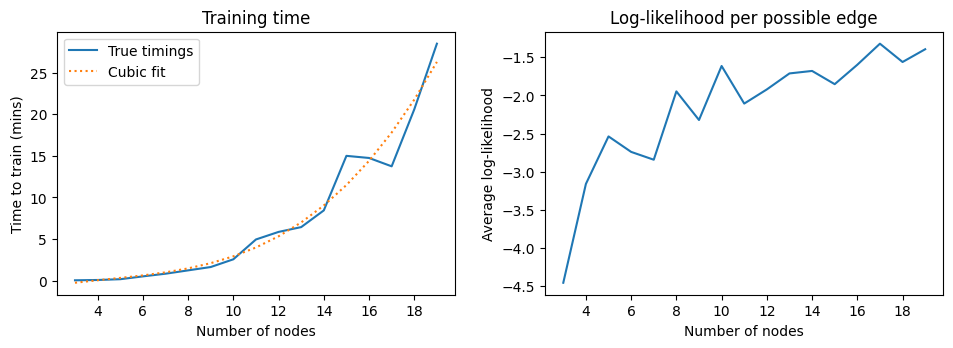

In [10]:
# Create the x-axis data
node_numbers = np.array(list(node_count for node_count in results.keys()))
node_numbers.sort()

# Create the subplots
fig, axes = plt.subplots(1, 2)

fig.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(3)

# Create the y-axis data for the time taken
times = np.array([results[node_count]['time_taken'] for node_count in node_numbers])

# Plot the time taken
axes[0].plot(
    node_numbers, times, label='True timings'
)

axes[0].set_xlabel('Number of nodes')
axes[0].set_ylabel('Time to train (mins)')
axes[0].set_title('Training time')

# Fit a cubic polynomial to the time-taken data
degree = 3
polynomial = np.polynomial.polynomial.Polynomial.fit(node_numbers, times, degree)
predicted = [
    polynomial(node_count)
    for node_count in node_numbers
]

# Plot the cubic polynomial
axes[0].plot(node_numbers, predicted, linestyle='dotted', label='Cubic fit')

axes[0].legend(loc='upper left')

# Create the y-axis data for the log-likelihood divided by n(n-1), that is
# the average log-likelihood per possible edge
log_likelihoods = \
    np.array([results[node_count]['log_likelihood']/(node_count*(node_count-1))
              for node_count in node_numbers])

# Plot the log-likelihood
axes[1].plot(
    node_numbers, log_likelihoods
)

axes[1].set_xlabel('Number of nodes')
axes[1].set_ylabel('Average log-likelihood')
axes[1].set_title('Log-likelihood per possible edge')

plt.show()